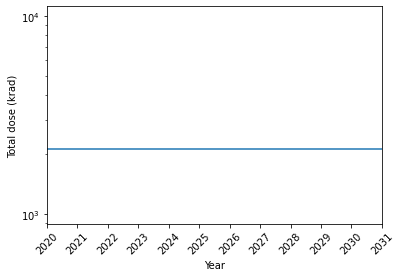

In [1]:
from util import parse_dose, DoseFields, pretty_save
import pandas as pd
import matplotlib.pyplot as plt

years = [*range(2020, 2032)]

files = [f"data/dose{y}.dos" for y in years]
df = pd.concat((parse_dose(f) for f in files), keys=years).loc[:, [DoseFields.thickness, DoseFields.total_dose]]
at_1mm = df.loc[df[DoseFields.thickness] == 1].unstack().droplevel(1, axis=1)

fig, ax = plt.subplots(1,1)
ax = at_1mm.plot(y=DoseFields.total_dose, use_index=True, legend=False, ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel(DoseFields.total_dose.value)
ax.set_yscale('log')
_ = ax.set_xticks(years)
ax.tick_params(axis='x',labelrotation=45 )
ax.set_xbound(lower=2020, upper=2031)
pretty_save(fig, "generated/TID_y2y.jpg")